# Project 1

## (Subject)

In [85]:
import pandas as pd
from matplotlib import pyplot as plt
import locale
import math
from countries import countries as c_list
import statsmodels.api as sm

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') 

'en_US.UTF-8'

## Import data

In [145]:
# Full-code example
# GDP_data = pd.read_csv("Data/SYB62_T13_201904_GDP_and_GDP_Per_Capita.csv", encoding="ISO-8859-1", skiprows=[0])

# Function to import
def myImport(target):
    out = pd.read_csv(target, skiprows = [0], encoding="ISO-8859-1")
    return out
    
LE_df = myImport("Data/SYB60_T03_Population Growth_Fertility_and_Mortality_Indicators.csv")
GDP_df = myImport("Data/SYB62_T13_201904_GDP_and_GDP_Per_Capita.csv")
POP_df = myImport("Data/SYB61_T02_Population_Surface_Area_and_Density.csv")
POPg_df = myImport("Data/SYB61_T03_Population_Growth_Rates_in_Urban_areas_and_Capital_cities.csv")
NRG_df = myImport( "Data/SYB62_T23_201904_Production_Trade_and_Supply_of_Energy.csv")

## Helper functions

In [263]:
# Original code:
#LE_filtered_df = LE_df.loc[(LE_df["Series"] == "Life expectancy at birth for both sexes (years)")]\
#    .drop(columns=["Footnotes", "Source", "Series"])\
#    .rename(columns={"Unnamed: 1": "Place",
#                     "Value": "Life Expectency"})

# Make it easier to filter data
def myFilter(df, series, name):
    # Build a drop list
    droplist = [var for var in df.columns if var not in ["Unnamed: 1", "Region/Country/Area", "Year", "Value"]]
    
    new = df.loc[df["Series"] == f"{series}"]\
        .drop(columns=droplist)\
        .rename(columns={"Unnamed: 1": "Place",
                         "Value": f"{name}"})\
        .set_index("Place", drop=True)\
        .loc[c_list]\
        .dropna()

    return new

## Life expectancy by GDP and Year

### Process data

In [152]:
# Filter on data applicible to Figure
LE_filtered_df = myFilter(LE_df, "Life expectancy at birth for both sexes (years)", "Life Expectancy")
GDP_filtered_df = myFilter(GDP_df, "GDP per capita (US dollars)", "GDP")

# Convert to numeric as needed and define transformed variable
LE_filtered_df["Life Expectancy"] = LE_filtered_df["Life Expectancy"].apply(pd.to_numeric)
GDP_filtered_df["GDP"] = GDP_filtered_df["GDP"].apply(locale.atoi)
GDP_filtered_df["Log GDP"] = GDP_filtered_df["GDP"].apply(math.log)

# Merge data
GDP_LE_df = LE_filtered_df.merge(GDP_filtered_df, on=["Region/Country/Area", "Place", "Year"], how="inner")
#GDP_LE_df = GDP_LE_df.set_index("Place", drop=True).loc[c_list].dropna()

# Give summary of data lost due to incomplete data
print(f"LE: {len(LE_filtered_df)}\nGDP: {len(GDP_filtered_df)}\nMERGED: {len(GDP_LE_df)}")
# TODO: Show which "Place" values are falling out

LE: 573
GDP: 1362
MERGED: 538


C:\Users\gless\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


### By-year snapshots

In [140]:
# Split up for snapshots
GDP_LE_2005 = GDP_LE_df.loc[GDP_LE_df["Year"] == 2005]
GDP_LE_2010 = GDP_LE_df.loc[GDP_LE_df["Year"] == 2010]
GDP_LE_2015 = GDP_LE_df.loc[GDP_LE_df["Year"] == 2015]

### Get regression line

In [141]:
# Get regression line for relationship
# Based on assumption there is a log-linear relation
# See https://blog.euromonitor.com/economic-growth-and-life-expectancy-do-wealthier-countries-live-longer/

model_2005 = sm.OLS(GDP_LE_2005_filter["Life Expectancy"], GDP_LE_2005_filter["Log GDP"])
slope_2005 = model_2005.fit().params.values[0]

model_2010 = sm.OLS(GDP_LE_2010_filter["Life Expectancy"], GDP_LE_2010_filter["Log GDP"])
slope_2010 = model_2010.fit().params.values[0]

model_2015 = sm.OLS(GDP_LE_2015_filter["Life Expectancy"], GDP_LE_2015_filter["Log GDP"])
slope_2015 = model_2015.fit().params.values[0]

print(f"Slopes:\n2005: {slope_2005}\n2010: {slope_2010}\n2015: {slope_2015}")

Slopes:
2005: 8.197707993708253
2010: 8.03807100943287
2015: 8.179411385594289


### Get bounds of plot

In [134]:
# Get bounds of plot

min_x = GDP_LE_df.sort_values("Log GDP").iloc[0]["Log GDP"]
max_x = GDP_LE_df.sort_values("Log GDP").iloc[-1]["Log GDP"]
min_y = GDP_LE_df.sort_values("Life Expectancy").iloc[0]["Life Expectancy"]
max_y = GDP_LE_df.sort_values("Life Expectancy").iloc[-1]["Life Expectancy"]

print(f"Min x: {min_x}\nMax x: {max_x}\nMin y: {min_y}\nMax y: {max_y}")

Min x: 4.51085950651685
Max x: 11.559541839598808
Min y: 41.3
Max y: 83.4


### Create the plot

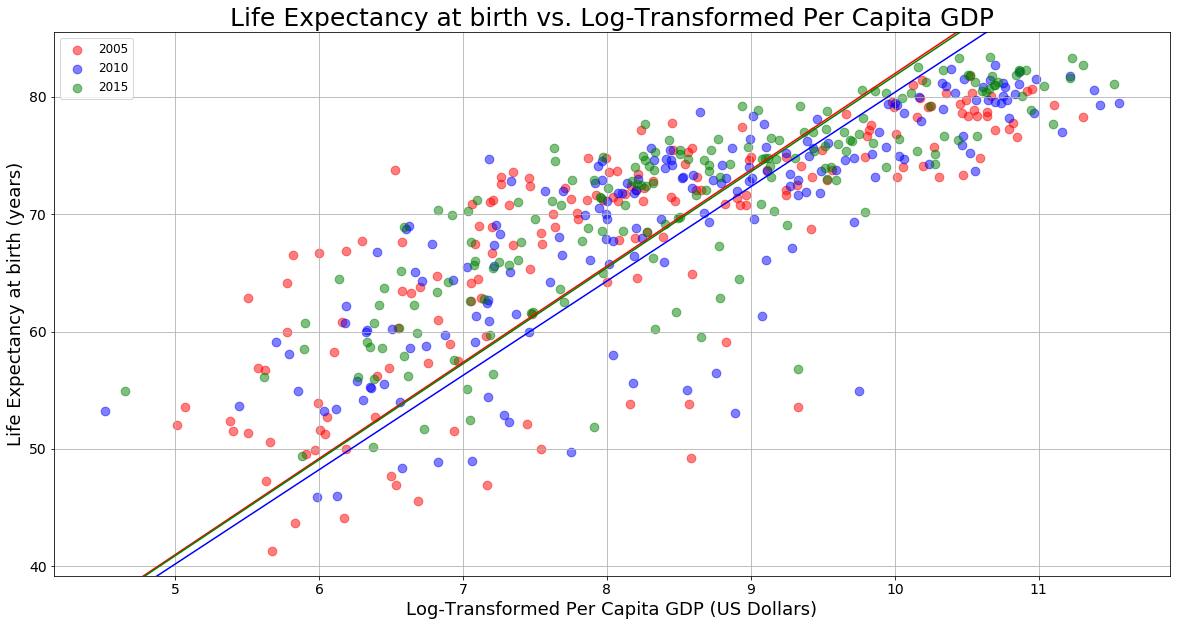

In [142]:
# Make the plots

# Initialize graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
ax.grid()
ax.set_xlim((min_x - 0.05*(max_x - min_x)), 
            (max_x + 0.05*(max_x - min_x)))
ax.set_ylim((min_y - 0.05*(max_y - min_y)), 
            (max_y + 0.05*(max_y - min_y)))
#ax.set_xticks(GDP_LE_2005_filter["GDP"].apply(locale.atoi))
ax.set_xlabel("Log-Transformed Per Capita GDP (US Dollars)", fontsize=18)
ax.set_ylabel("Life Expectancy at birth (years)", fontsize=18)
ax.set_title("Life Expectancy at birth vs. Log-Transformed Per Capita GDP", fontsize=25)
ax.tick_params(labelsize=14)

# Plot one year
ax.scatter(GDP_LE_2005_filter["Log GDP"],
           GDP_LE_2005_filter["Life Expectancy"].apply(pd.to_numeric),
           s = 75,
           c = "red",
           alpha = 0.5,
           marker = "o",
           label="2005")

ax.plot([min_x - 0.05*(max_x - min_x), max_x + 0.05*(max_x - min_x)],
        [slope_2005 * (min_x - 0.05*(max_x - min_x)), slope_2005 * (max_x + 0.05*(max_x - min_x))],
        color = "red")

ax.scatter(GDP_LE_2010_filter["Log GDP"],
           GDP_LE_2010_filter["Life Expectancy"].apply(pd.to_numeric),
           s = 75,
           c = "blue",
           alpha = 0.5,
           marker = "o",
           label="2010")

ax.plot([min_x - 0.05*(max_x - min_x), max_x + 0.05*(max_x - min_x)],
        [slope_2010 * (min_x - 0.05*(max_x - min_x)), slope_2010 * (max_x + 0.05*(max_x - min_x))],
        color = "blue")

ax.scatter(GDP_LE_2015_filter["Log GDP"],
           GDP_LE_2015_filter["Life Expectancy"].apply(pd.to_numeric),
           s = 75,
           c = "green",
           alpha = 0.5,
           marker = "o",
           label="2015")

ax.plot([min_x - 0.05*(max_x - min_x), max_x + 0.05*(max_x - min_x)],
        [slope_2015 * (min_x - 0.05*(max_x - min_x)), slope_2015 * (max_x + 0.05*(max_x - min_x))],
        color = "green")

ax.legend(fontsize=12)

plt.savefig("GDP_logLE.png")

## Population summaries

### Process Data

In [222]:
# Filter population data
POP_filtered_df = myFilter(POP_df, "Population mid-year estimates (millions)", "Total Population")

POP_filtered_df["Total Population"] = POP_filtered_df["Total Population"].transform(lambda x: x.replace(',', '')).apply(float)

top_5 = POP_filtered_df.loc[POP_filtered_df["Year"] == 2015]\
    .sort_values("Total Population")\
    .tail(5)\
    .index\
    .to_list()

bottom_5 = POP_filtered_df.loc[POP_filtered_df["Year"] == 2015]\
    .sort_values("Total Population")\
    .head(5)\
    .index\
    .to_list()

['Brazil', 'Indonesia', 'United States of America', 'India', 'China']


C:\Users\gless\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


### Get bounds of plot

In [183]:
# Get bounds of plot

min_x = POP_filtered_df.sort_values("Year").iloc[0]["Year"]
max_x = POP_filtered_df.sort_values("Year").iloc[-1]["Year"]
min_y = POP_filtered_df.sort_values("Total Population").iloc[0]["Total Population"]
max_y = POP_filtered_df.sort_values("Total Population").iloc[-1]["Total Population"]

# Noticed hardly any countries had 2000 data.  Manually bump up to 2005. 
min_x = 2005

print(f"Min x: {min_x}\nMax x: {max_x}\nMin y: {min_y}\nMax y: {max_y}")

POP_filtered_df.sort_values("Total Population").head()

Min x: 2005
Max x: 2018.0
Min y: 0.0
Max y: 1415.05


,Region/Country/Area,Year,Total Population
Place,,,
Niue,570.0,2018.0,0.0
Tokelau,772.0,2015.0,0.0
Tokelau,772.0,2010.0,0.0
Tokelau,772.0,2006.0,0.0
Tokelau,772.0,2005.0,0.0


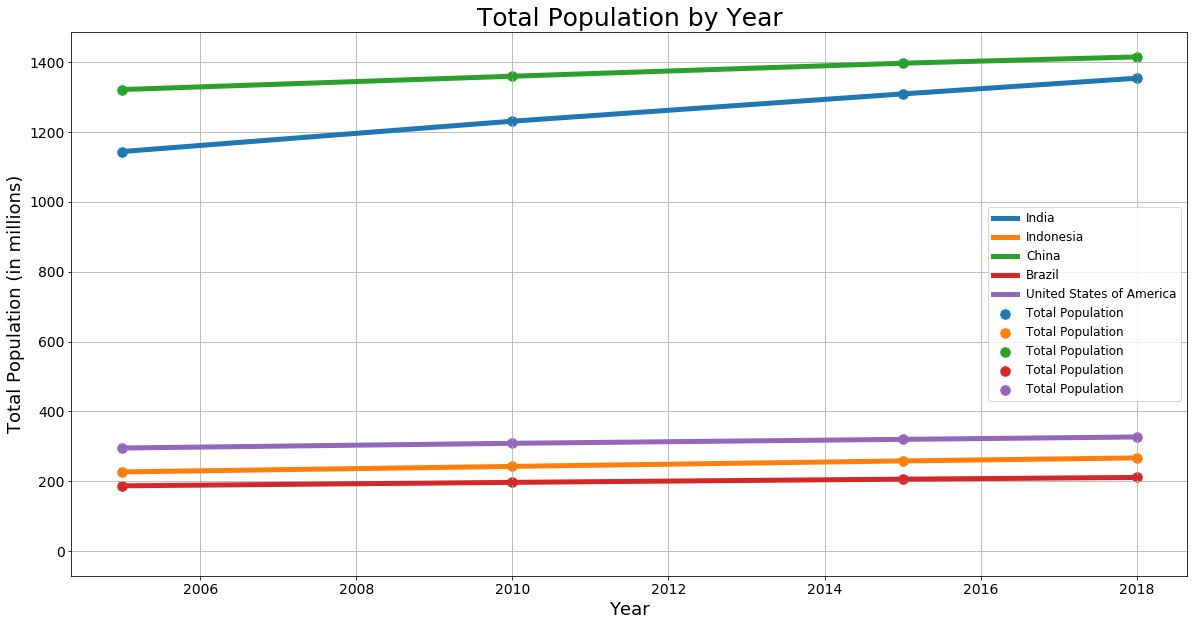

In [204]:
# Initialize graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
ax.grid()
ax.set_xlim((min_x - 0.05*(max_x - min_x)), 
            (max_x + 0.05*(max_x - min_x)))
ax.set_ylim((min_y - 0.05*(max_y - min_y)), 
            (max_y + 0.05*(max_y - min_y)))
#ax.set_xticks(GDP_LE_2005_filter["GDP"].apply(locale.atoi))
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Total Population (in millions)", fontsize=18)
ax.set_title("Total Population by Year", fontsize=25)
ax.tick_params(labelsize=14)

# Plot top 5
for term in set(POP_filtered_df.index):
    if term in top_5:
        ax.plot(POP_filtered_df.loc[term]["Year"], 
                POP_filtered_df.loc[term]["Total Population"],
                label = term,
                linewidth = 5)
        ax.scatter(POP_filtered_df.loc[term]["Year"],
                   POP_filtered_df.loc[term]["Total Population"],
                   s = 90,
                   marker = "o")
    
ax.legend(fontsize=12)

## Urbanization

In [267]:
# Filter population data

POPg_filtered_df = myFilter(POPg_df, "Urban population (percent)", "Urban Population")
POPg_filtered_df["Urban Population"] = POPg_filtered_df["Urban Population"].apply(pd.to_numeric)

top_5 = POPg_filtered_df.loc[POPg_filtered_df["Year"] == 2015]\
    .sort_values("Urban Population")\
    .tail(5)\
    .index\
    .to_list()

bottom_5 = POPg_filtered_df.loc[POPg_filtered_df["Year"] == 2015]\
    .sort_values("Urban Population")\
    .head(5)\
    .index\
    .to_list()

print(f"Top: {top_5}")
print(f"Bottom: {bottom_5}")

Top: ['Monaco', 'Anguilla', 'Nauru', 'Holy See', 'Cayman Islands']
Bottom: ['Wallis and Futuna Islands', 'Tokelau', 'Montserrat', 'Burundi', 'Papua New Guinea']


C:\Users\gless\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


,Region/Country/Area,Year,Urban Population
Place,,,
Wallis and Futuna Islands,876.0,2015.0,0.0
Tokelau,772.0,2015.0,0.0
Montserrat,500.0,2015.0,9.0
Burundi,108.0,2015.0,12.1
Papua New Guinea,598.0,2015.0,13.0


### Get bounds

In [269]:
# Get bounds of plot

min_x = POPg_filtered_df.sort_values("Year").iloc[0]["Year"]
max_x = POPg_filtered_df.sort_values("Year").iloc[-1]["Year"]
min_y = POPg_filtered_df.sort_values("Urban Population").iloc[0]["Urban Population"]
max_y = POPg_filtered_df.sort_values("Urban Population").iloc[-1]["Urban Population"]

# Noticed hardly any countries had 2000 data.  Manually bump up to 2005. 
min_x = 2005

print(f"Min x: {min_x}\nMax x: {max_x}\nMin y: {min_y}\nMax y: {max_y}")

Min x: 2005
Max x: 2018.0
Min y: 0.0
Max y: 100.0


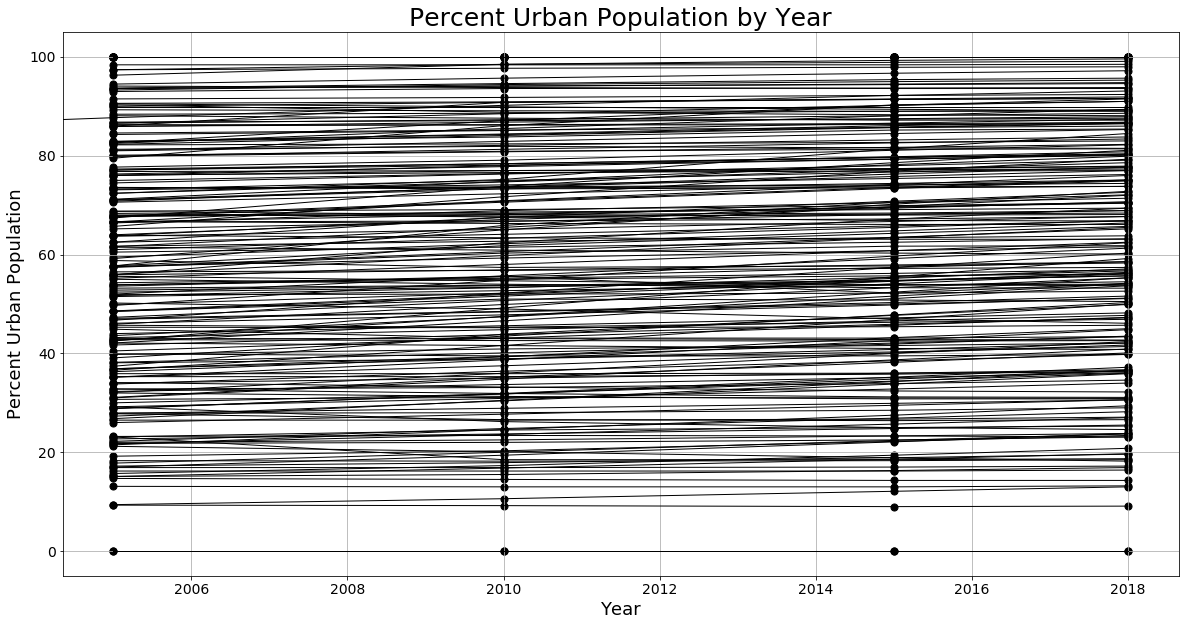

In [274]:
# Initialize graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
ax.grid()
ax.set_xlim((min_x - 0.05*(max_x - min_x)), 
            (max_x + 0.05*(max_x - min_x)))
ax.set_ylim((min_y - 0.05*(max_y - min_y)), 
            (max_y + 0.05*(max_y - min_y)))
#ax.set_xticks(GDP_LE_2005_filter["GDP"].apply(locale.atoi))
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Percent Urban Population", fontsize=18)
ax.set_title("Percent Urban Population by Year", fontsize=25)
ax.tick_params(labelsize=14)

# Plot top 5
for term in set(POPg_filtered_df.index):
    ax.plot(POPg_filtered_df.loc[term]["Year"], 
            POPg_filtered_df.loc[term]["Urban Population"],
            label = term,
            color = "black",
            linewidth = 1)
    ax.scatter(POPg_filtered_df.loc[term]["Year"],
               POPg_filtered_df.loc[term]["Urban Population"],
               s = 50,
               color = "black",
               marker = "o")

plt.show()

## Show what's in directory

In [143]:
# Show what data we have
import os
os.listdir("Data")

['.coutries.py.un~',
 '.swp',
 'countries.py',
 'coutries.py',
 'coutries.py~',
 'README_DATA.md',
 'SYB60_T03_Population Growth_Fertility_and_Mortality_Indicators.csv',
 'SYB61_T02_Population_Surface_Area_and_Density.csv',
 'SYB61_T03_Population_Growth_Rates_in_Urban_areas_and_Capital_cities.csv',
 'SYB62_T13_201904_GDP_and_GDP_Per_Capita.csv',
 'SYB62_T23_201904_Production_Trade_and_Supply_of_Energy.csv']

In [207]:
POPg_df.head(20)

,Region/Country/Area,Unnamed: 1,Year,Series,Capital City,Capital City footnote,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Urban population (percent),NaN,NaN,49.2,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2005,Urban population (percent growth rate per annum),NaN,NaN,2.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2005,Rural population (percent growth rate per annum),NaN,NaN,0.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,Urban population (percent),NaN,NaN,51.7,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Urban population (percent growth rate per annum),NaN,NaN,2.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
5,1,"Total, all countries or areas",2010,Rural population (percent growth rate per annum),NaN,NaN,0.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
6,1,"Total, all countries or areas",2015,Urban population (percent),NaN,NaN,53.9,NaN,"United Nations Population Division, New York, ..."
7,1,"Total, all countries or areas",2015,Urban population (percent growth rate per annum),NaN,NaN,2.0,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
8,1,"Total, all countries or areas",2015,Rural population (percent growth rate per annum),NaN,NaN,0.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
9,1,"Total, all countries or areas",2018,Urban population (percent),NaN,NaN,55.3,NaN,"United Nations Population Division, New York, ..."
